In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score, Aesthetics
#%matplotlib qt

In [2]:
model_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\Meloxicam\2022-09-02_moseq\models-mean-target\rOT_model_1000-5.fixed.p"
index_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\Meloxicam\2022-09-02_moseq\moseq2-index.role.yaml"

max_syllable = 70

groups = [
    'MIA bsl + saline',
    'MIA bsl + gaba',
    'MIA 3d',
    'MIA 10d + saline',
    'MIA 10d + gaba'
]


In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
aes = Aesthetics(groups)
representations.describe()

pruned 2601 transitions which are never used
71 modules in usages
71 modules in frames
2440 transitions in trans

Breakdown of 58 samples across 5 classes:
9 MIA 10d + gaba
10 MIA bsl + saline
19 MIA 3d
10 MIA 10d + saline
10 MIA bsl + gaba


Best value for parameter "shrinkage" is auto
Achieving a mean accuracy of ~61.5% ± 14.33% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
                  precision    recall  f1-score   support

  MIA 10d + gaba       0.40      0.67      0.50         3
MIA 10d + saline       0.40      0.67      0.50         3
          MIA 3d       0.33      0.17      0.22         6
  MIA bsl + gaba       0.67      0.67      0.67         3
MIA bsl + saline       0.00      0.00      0.00         3

        accuracy                           0.39        18
       macro avg       0.36      0.43      0.38        18
    weighted avg       0.36      0.39      0.35        18

LDA Score: 0.8103448275862069
LDA Explained Variance: [8.4422568  5.20702187]
                  precision    recall  f1-score   support

  MIA 10d + gaba       0.73      0.89      0.

<AxesSubplot:xlabel='Accuracy score', ylabel='Probability'>

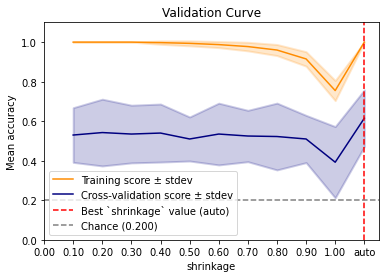

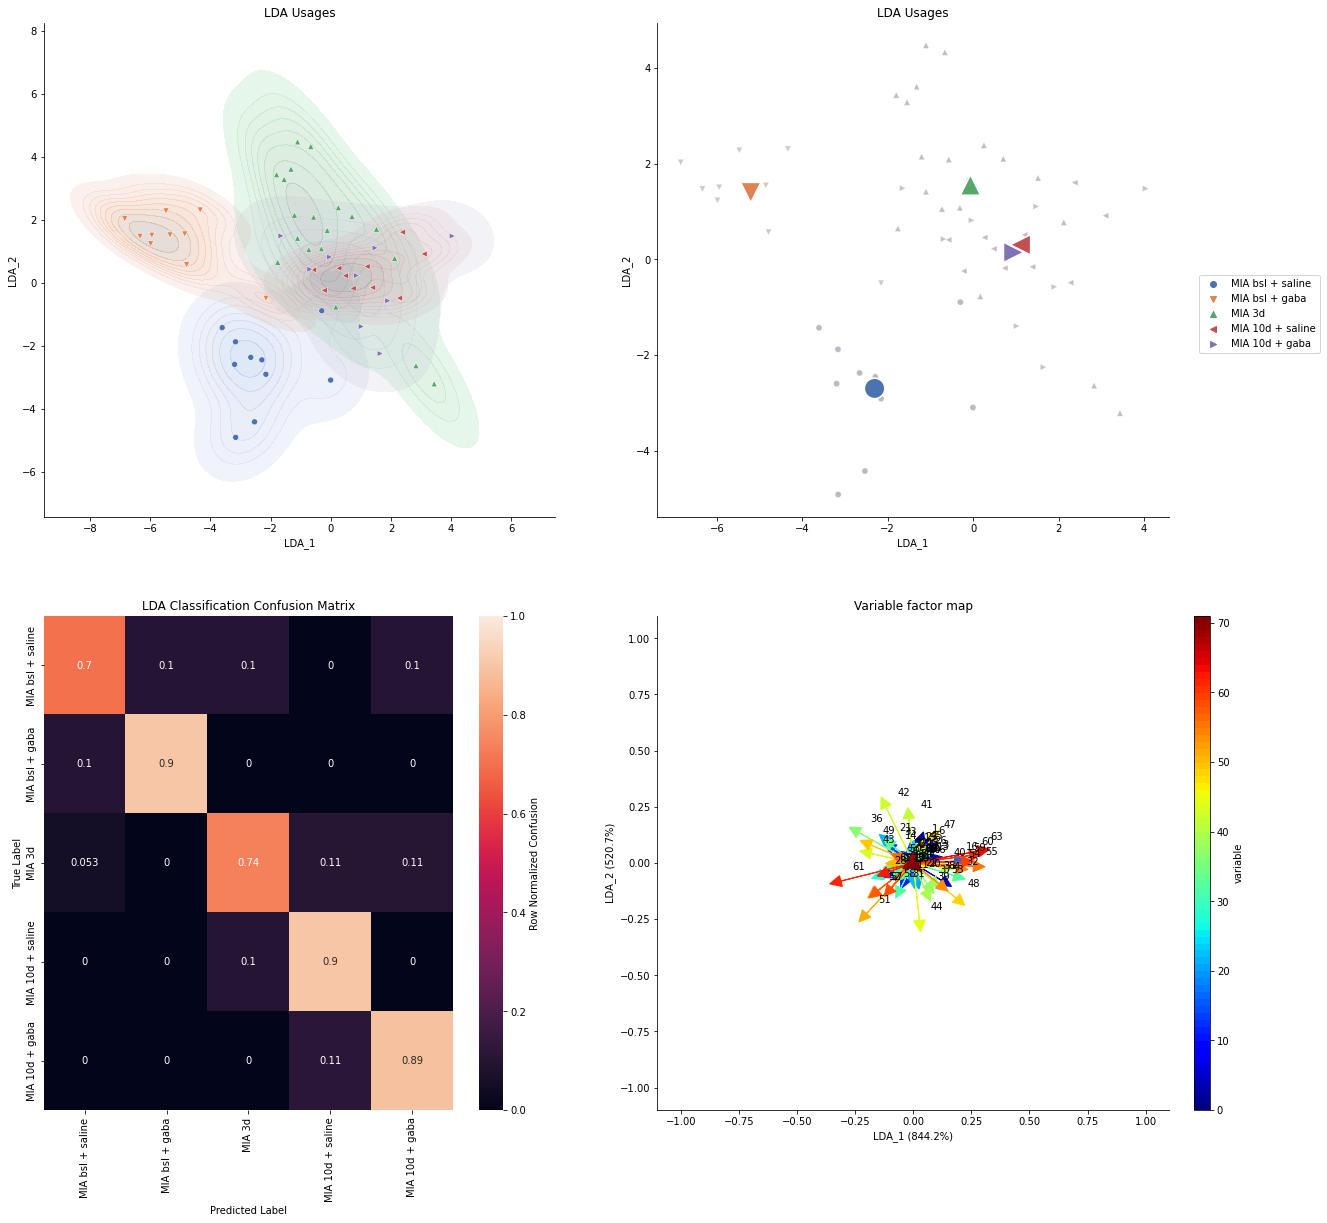

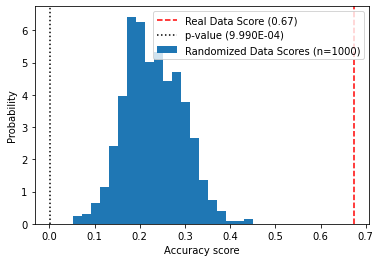

In [4]:
results = train_lda_pipeline(representations, 'usages', lda_kwargs={'n_components': 2})
plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.final, representations, aes=aes, title='LDA Usages')
plot_permutation_score(results.final.estimator, results.data.usages, results.data.groups)

LDA Score: 1.0
LDA Explained Variance: [8.4422568  5.20702187]
                  precision    recall  f1-score   support

  MIA 10d + gaba       1.00      1.00      1.00         6
MIA 10d + saline       1.00      1.00      1.00         7
          MIA 3d       1.00      1.00      1.00        13
  MIA bsl + gaba       1.00      1.00      1.00         7
MIA bsl + saline       1.00      1.00      1.00         7

        accuracy                           1.00        40
       macro avg       1.00      1.00      1.00        40
    weighted avg       1.00      1.00      1.00        40

LDA Score: 0.3888888888888889
LDA Explained Variance: [8.4422568  5.20702187]
                  precision    recall  f1-score   support

  MIA 10d + gaba       0.40      0.67      0.50         3
MIA 10d + saline       0.40      0.67      0.50         3
          MIA 3d       0.33      0.17      0.22         6
  MIA bsl + gaba       0.67      0.67      0.67         3
MIA bsl + saline       0.00      0.00      

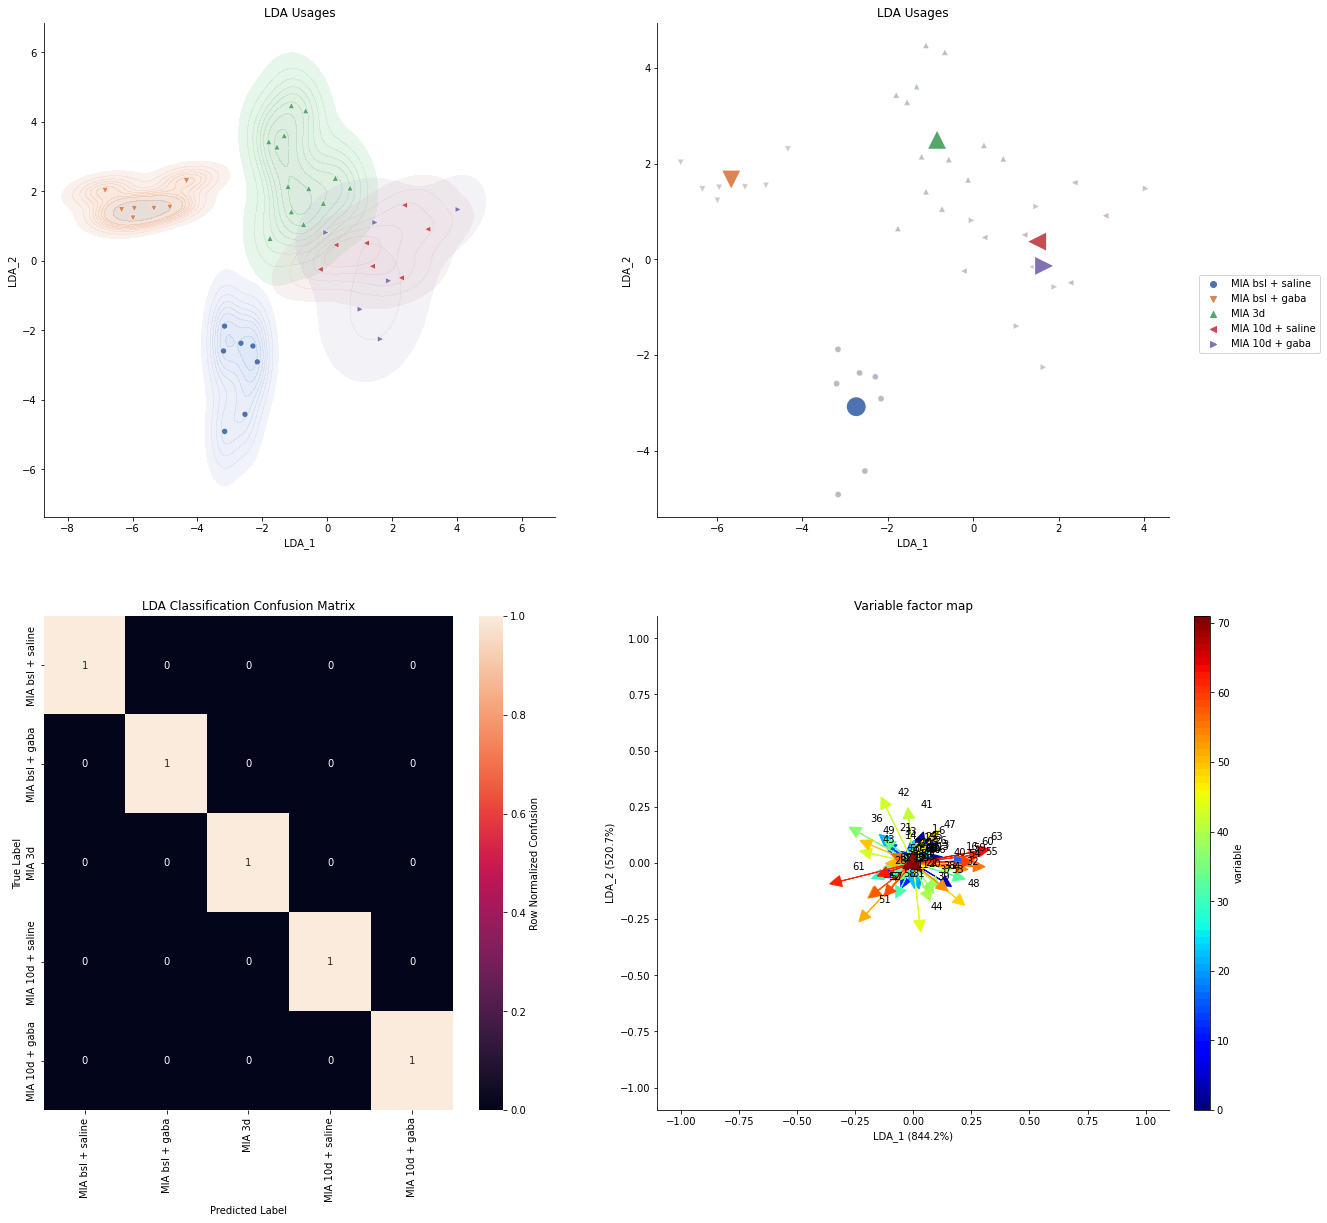

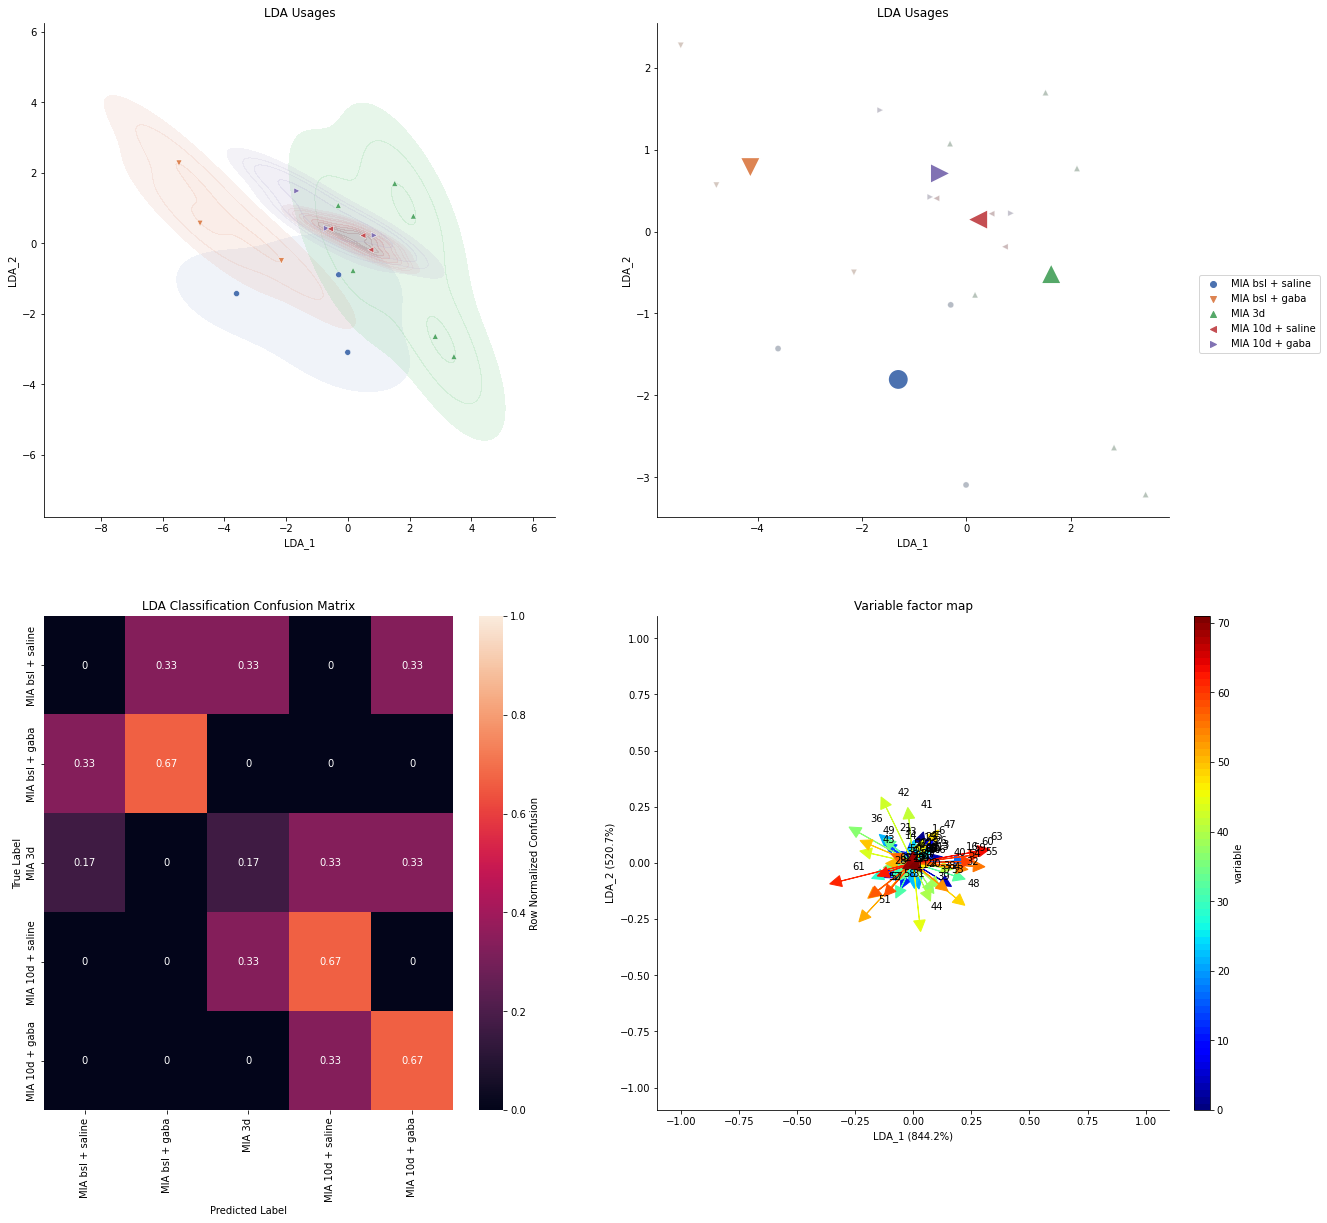

In [5]:
fig, axs, df = plot_lda_results(results.final, results.train, aes=aes, title='LDA Usages')
fig, axs, df = plot_lda_results(results.final, results.test, aes=aes, title='LDA Usages')